In [2]:
import numpy as np
from obspy.taup import TauPyModel
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
model = TauPyModel(model="iasp91")

## ObsPy Tutorial

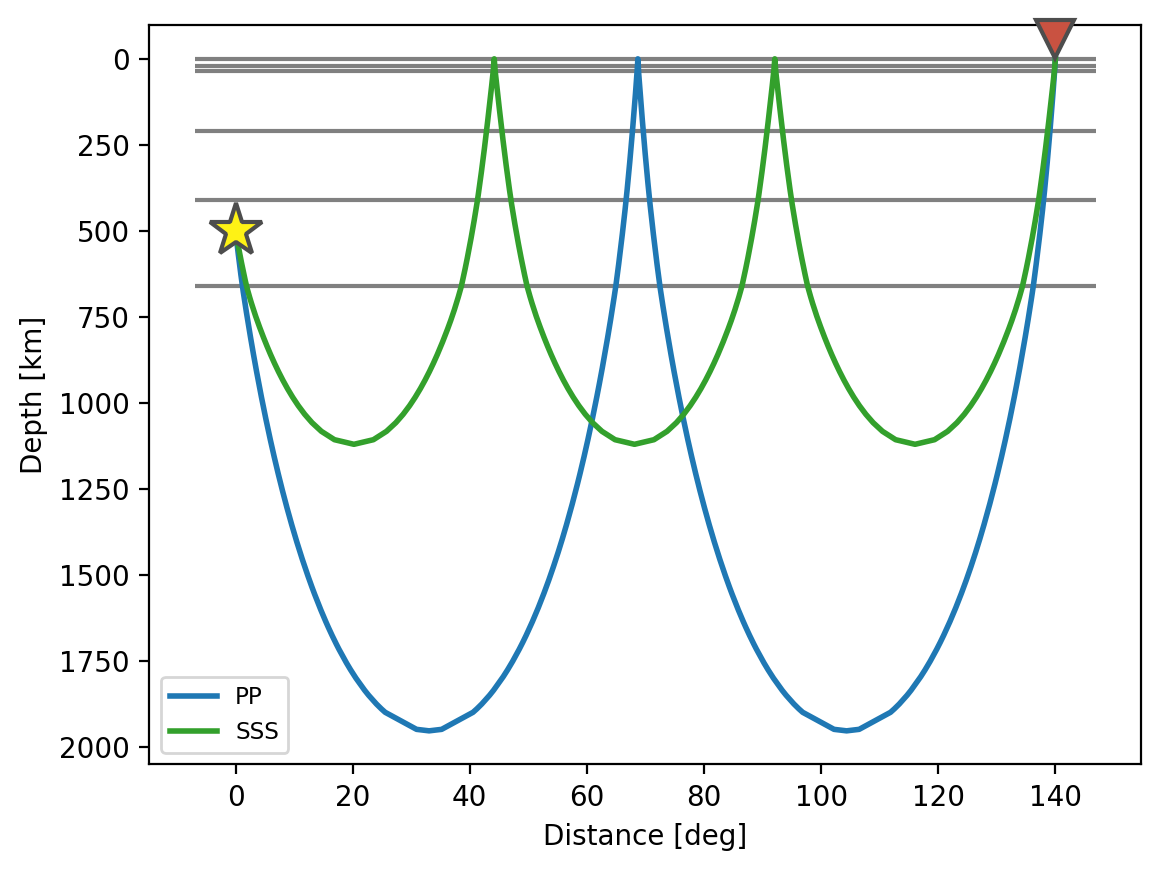

<Axes: xlabel='Distance [deg]', ylabel='Depth [km]'>

In [3]:
arrivals = model.get_ray_paths(500, 140, phase_list=['PP', 'SSS'])
arrivals.plot_rays(plot_type='cartesian', phase_list=['PP', 'SSS'],
                   plot_all=False, legend=True)

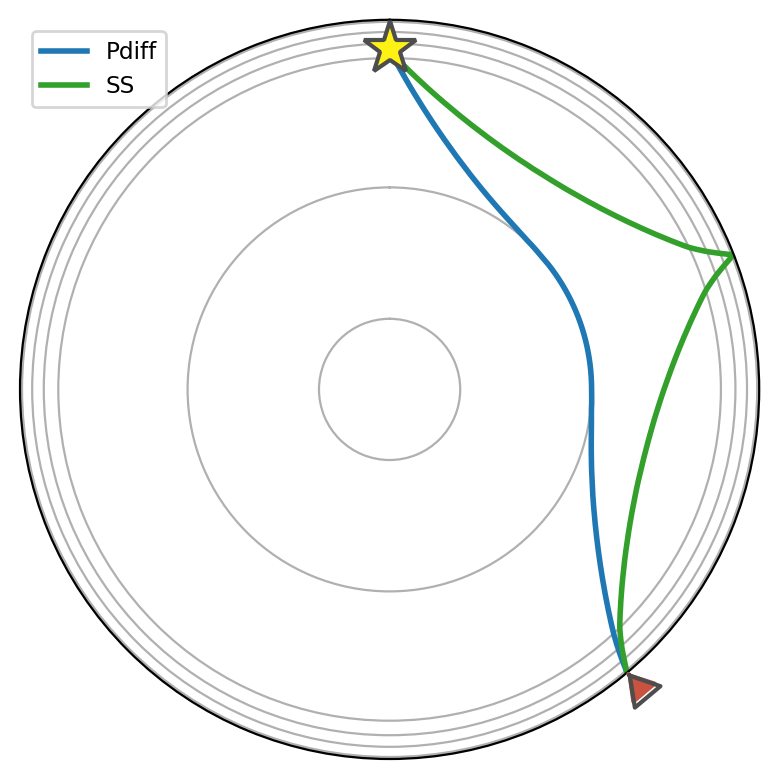

<PolarAxes: >

In [4]:
arrivals = model.get_ray_paths(500, 140, phase_list=['Pdiff', 'SS'])
arrivals.plot_rays(plot_type='spherical', phase_list=['Pdiff', 'SS'],
                   legend=True)

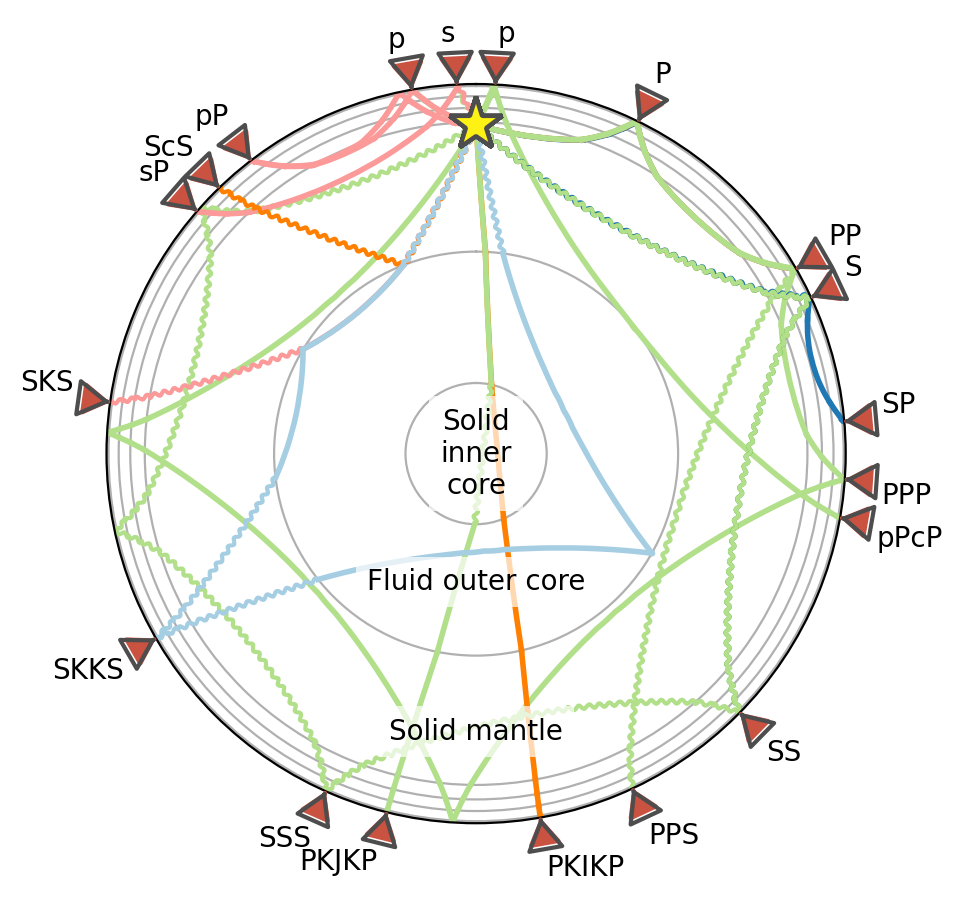

In [5]:
PHASES = [
    # Phase, distance
    ('P', 26),
    ('PP', 60),
    ('PPP', 94),
    ('PPS', 155),
    ('p', 3),
    ('pPcP', 100),
    ('PKIKP', 170),
    ('PKJKP', 194),
    ('S', 65),
    ('SP', 85),
    ('SS', 134.5),
    ('SSS', 204),
    ('p', -10),
    ('pP', -37.5),
    ('s', -3),
    ('sP', -49),
    ('ScS', -44),
    ('SKS', -82),
    ('SKKS', -120),
]

fig, ax = plt.subplots(subplot_kw=dict(polar=True))

# Plot all pre-determined phases
for phase, distance in PHASES:
    arrivals = model.get_ray_paths(700, distance, phase_list=[phase])
    ax = arrivals.plot_rays(plot_type='spherical',
                            legend=False, label_arrivals=True,
                            plot_all=True,
                            show=False, ax=ax, indicate_wave_type=True)

# Annotate regions
ax.text(0, 0, 'Solid\ninner\ncore',
        horizontalalignment='center', verticalalignment='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
ocr = (model.model.radius_of_planet -
       (model.model.s_mod.v_mod.iocb_depth +
        model.model.s_mod.v_mod.cmb_depth) / 2)
ax.text(np.deg2rad(180), ocr, 'Fluid outer core',
        horizontalalignment='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
mr = model.model.radius_of_planet - model.model.s_mod.v_mod.cmb_depth / 2
ax.text(np.deg2rad(180), mr, 'Solid mantle',
        horizontalalignment='center',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.show()

## ObsPy Data Obtaining

In [4]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from obspy.clients.fdsn.header import URL_MAPPINGS

In [5]:
for k in URL_MAPPINGS.keys():
    print(k)

AUSPASS
BGR
EIDA
ETH
EMSC
GEONET
GEOFON
GFZ
ICGC
IESDMC
INGV
IPGP
IRIS
IRISPH5
ISC
KNMI
KOERI
LMU
NCEDC
NIEP
NOA
ODC
ORFEUS
RESIF
RESIFPH5
RASPISHAKE
SCEDC
TEXNET
UIB-NORSAR
USGS
USP


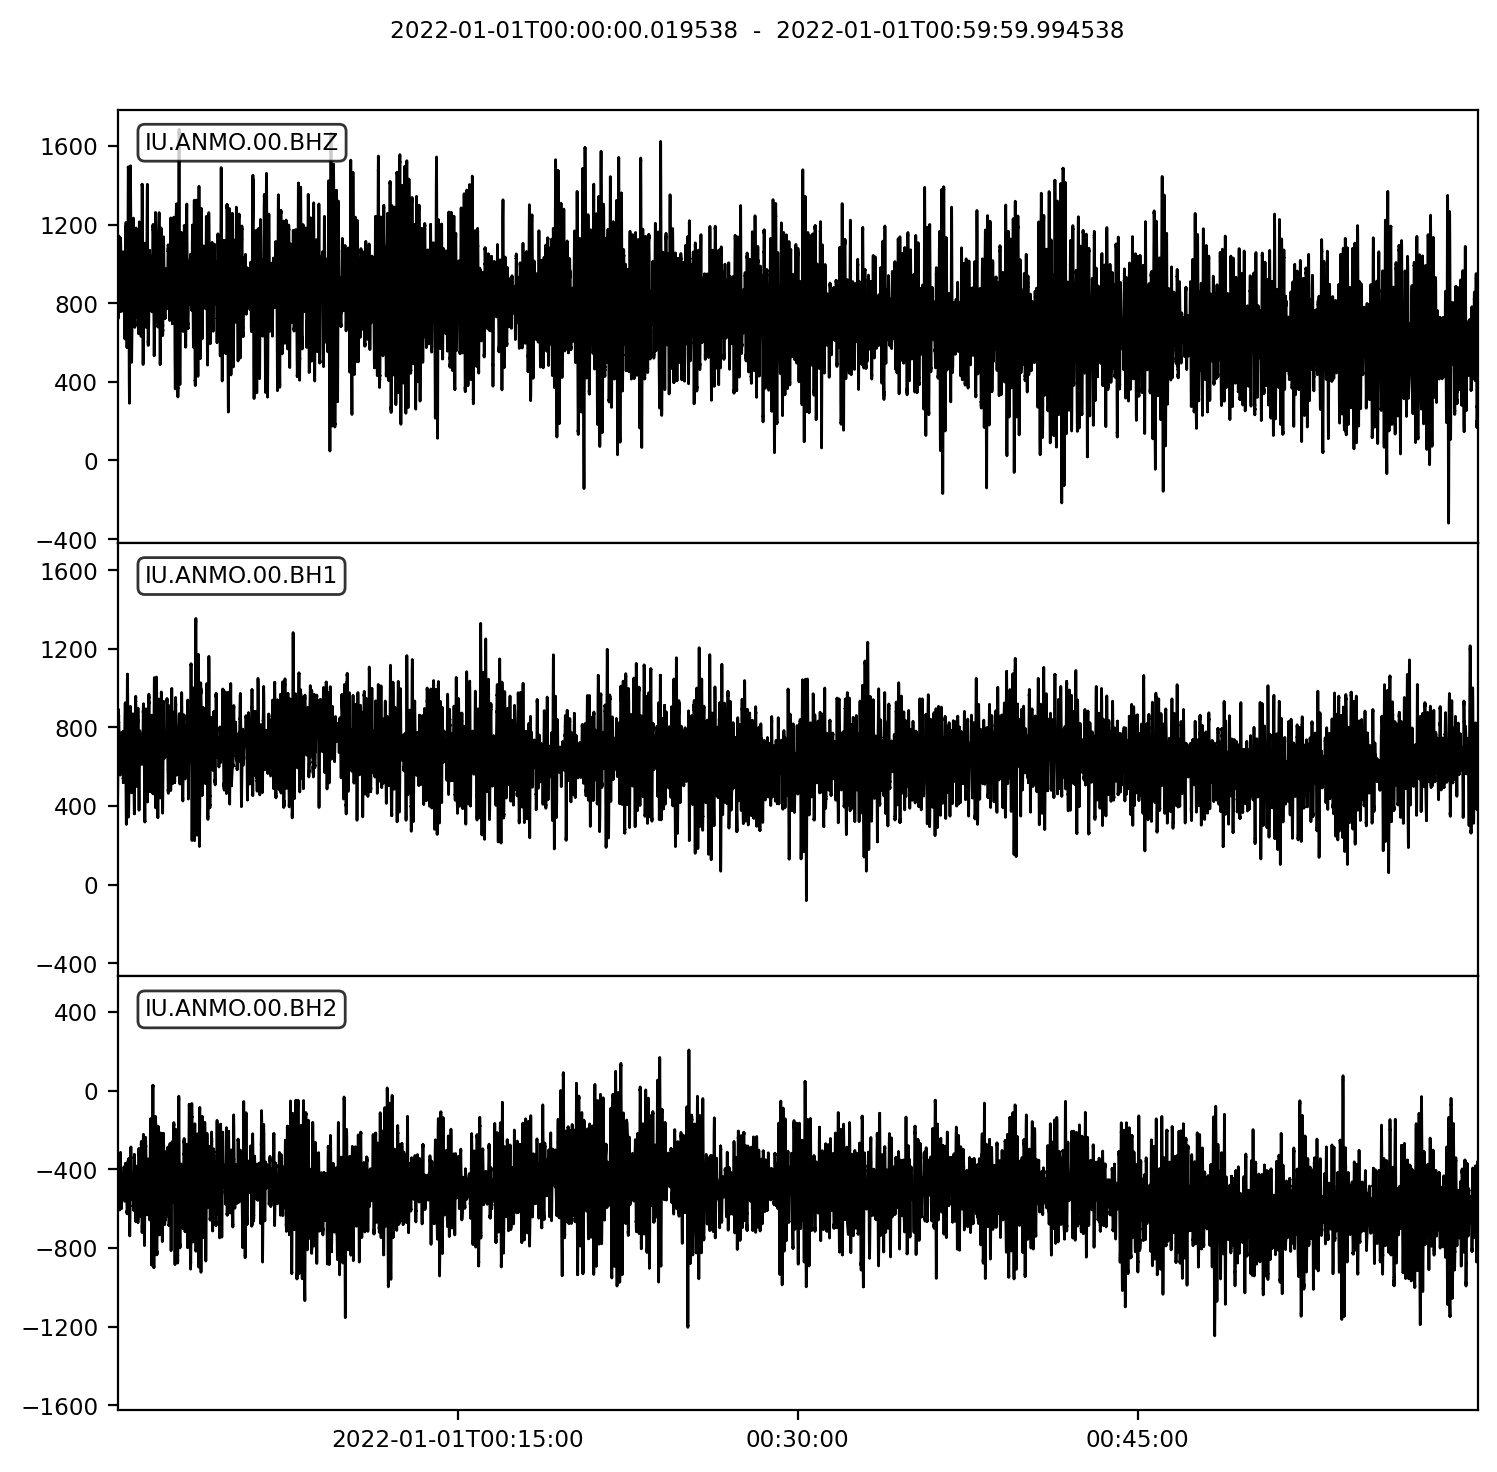

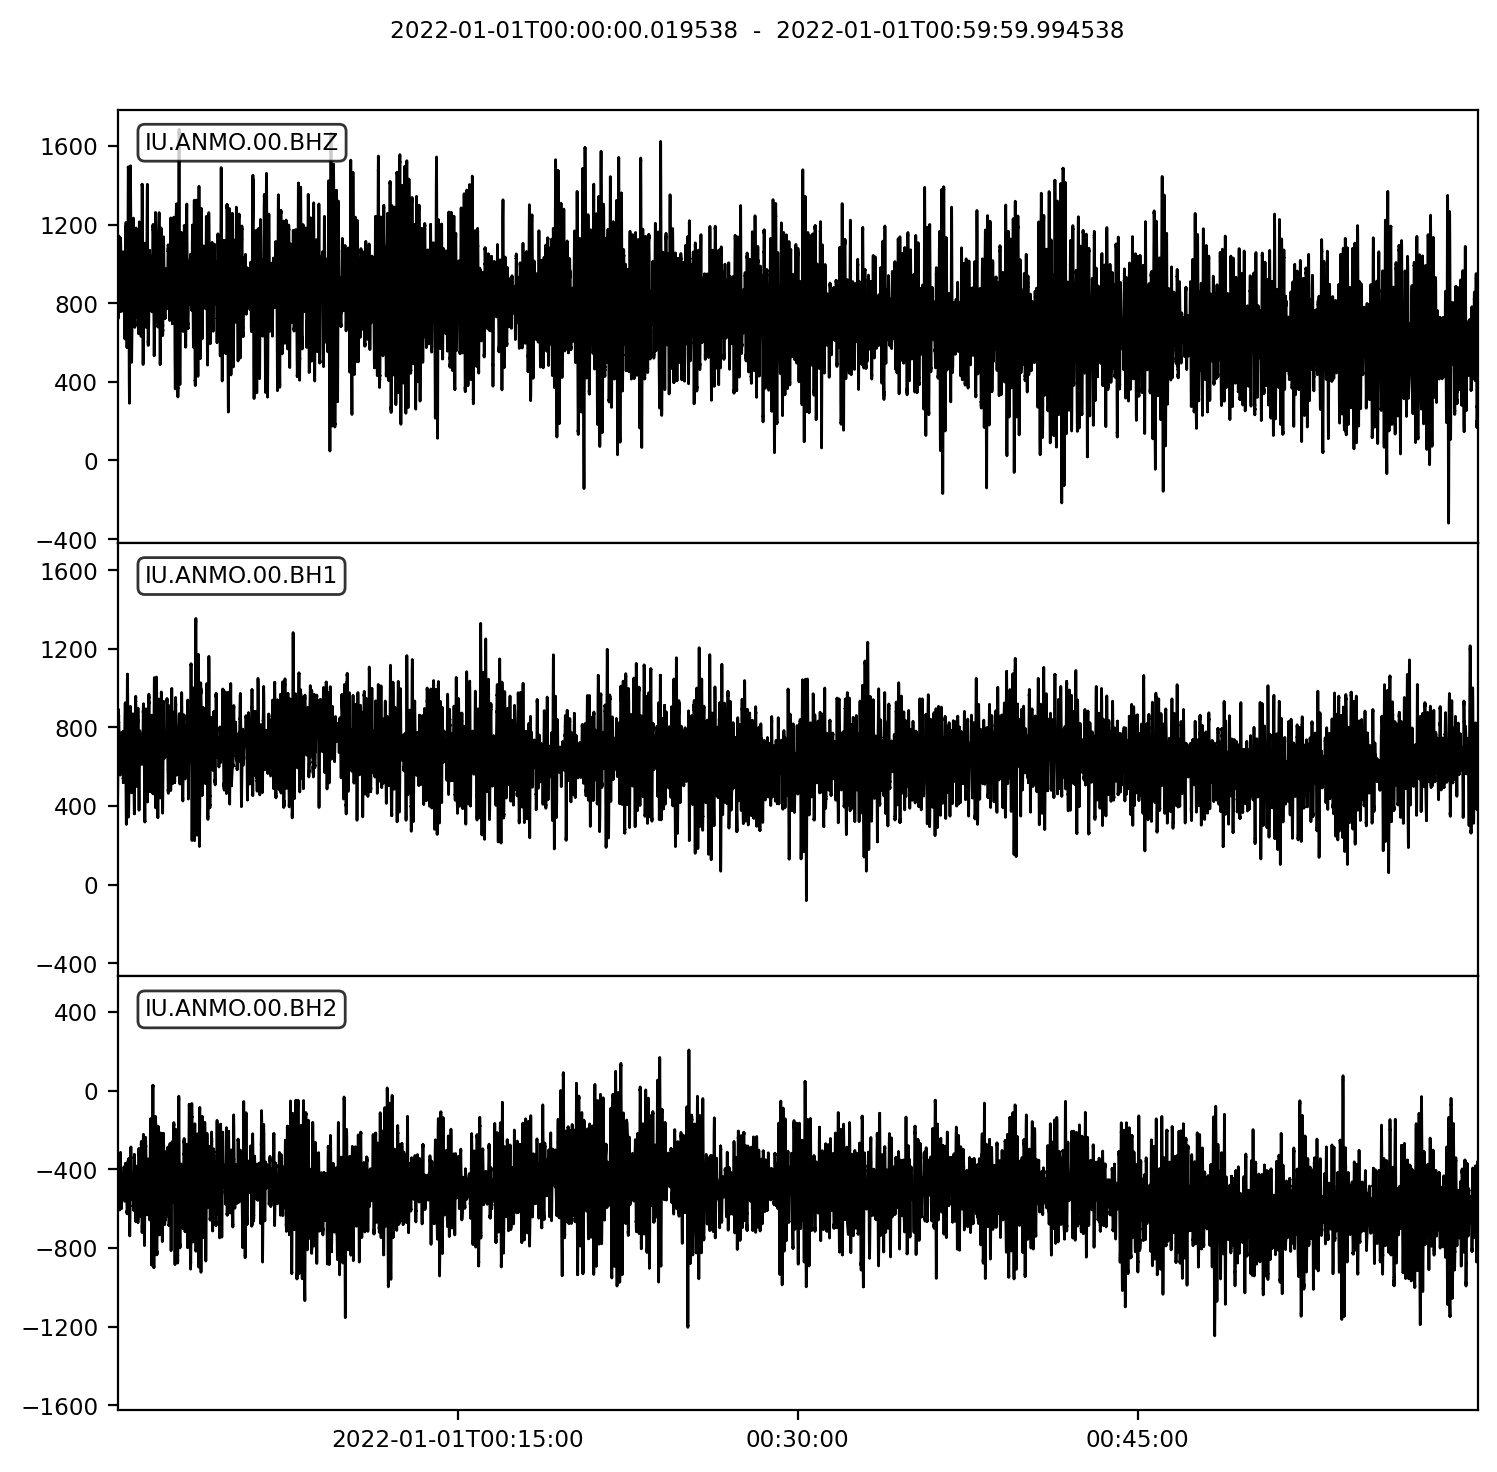

In [ ]:
client = Client("IRIS")
start = UTCDateTime("2022-01-01T00:00:00")
end   = start + 3600  # 1 hour
st = client.get_waveforms(network="IU", station="ANMO", location="00", channel="BH*", starttime=start, endtime=end)
st.plot()

## Some Testing 1

In [11]:
client = Client("IRIS")
t1, t2 = UTCDateTime("2023-05-01"), UTCDateTime("2023-05-02")
catalog = client.get_events(starttime=t1, endtime=t2, minmagnitude=4.0)
event = catalog[0]
origin = event.preferred_origin() or event.origins[0]
evlat, evlon, evdepth = origin.latitude, origin.longitude, origin.depth / 1000

inventory = client.get_stations(network="*", station="*")
st_lat = inventory[0][0].latitude
st_lon = inventory[0][0].longitude

from obspy.geodetics import locations2degrees
distance_deg = locations2degrees(evlat, evlon, st_lat, st_lon)
arrivals = model.get_travel_times(source_depth_in_km=evdepth, distance_in_degree=distance_deg)
for arr in arrivals:
    print(arr.name, arr.time, "s")

P 752.0969026284014 s
pP 755.4222177098221 s
PcP 755.6012345602546 s
sP 756.7005775164407 s
PP 946.4748769462915 s
PKiKP 1066.31365098662 s
pPKiKP 1069.7497413083079 s
sPKiKP 1071.004360914958 s
SKiKP 1280.5089809487306 s
SKS 1374.8369448283481 s
S 1378.3212899912357 s
pSKS 1379.3769759230036 s
SKKS 1380.5969615215577 s
sSKS 1380.6732633686422 s
pS 1382.6310925012285 s
sS 1383.9966965344456 s
ScS 1389.4867483555272 s
SP 1430.4811155164268 s
PS 1431.9182619260498 s
SS 1708.8777777553626 s
PKIKKIKP 1835.042299452558 s
PKKP 1844.1529735018596 s
SKIKKIKP 2049.2305601131607 s
PKIKKIKS 2050.4851815941 s
SKKP 2061.9660923880124 s
PKKS 2063.2231357057585 s
SKIKKIKS 2264.465785206896 s
SKKS 2280.0807643844605 s
PKIKPPKIKP 2330.0332220206988 s
SKIKSSKIKS 3192.631606098213 s
SKSSKS 3201.1711172954633 s


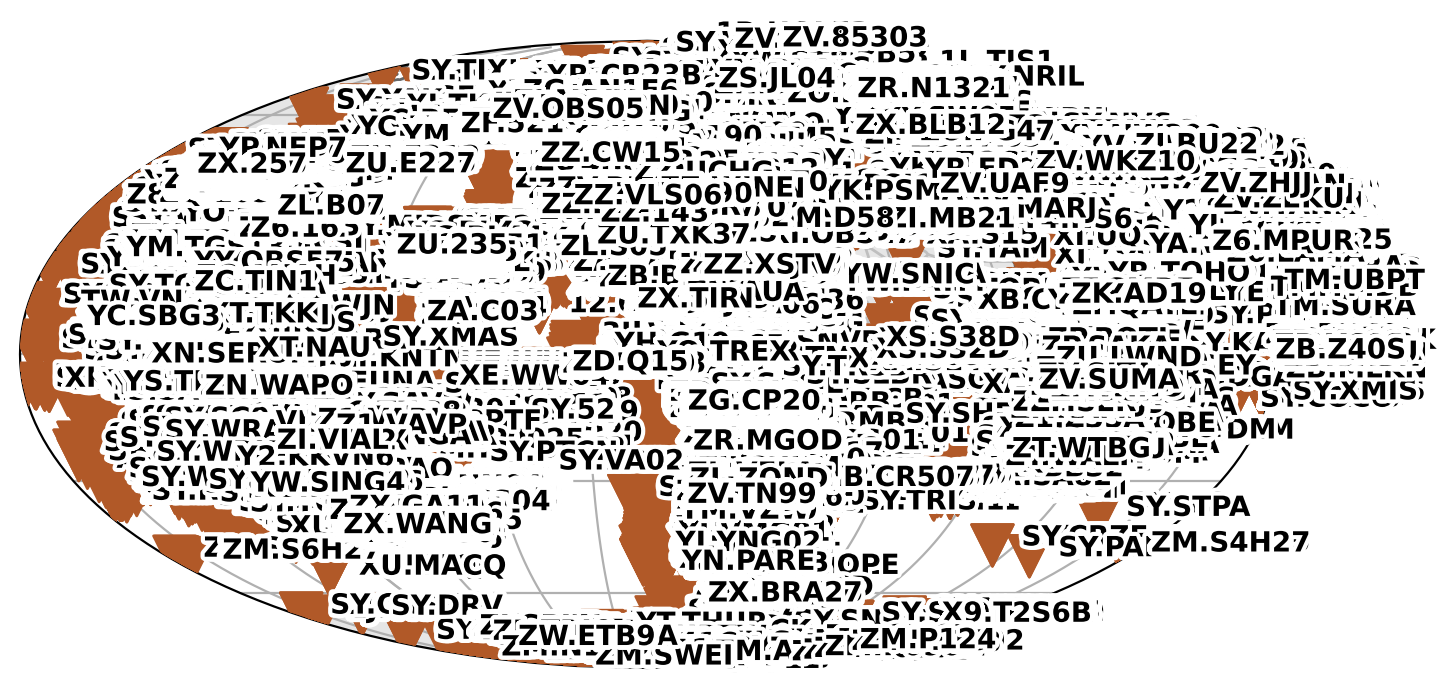

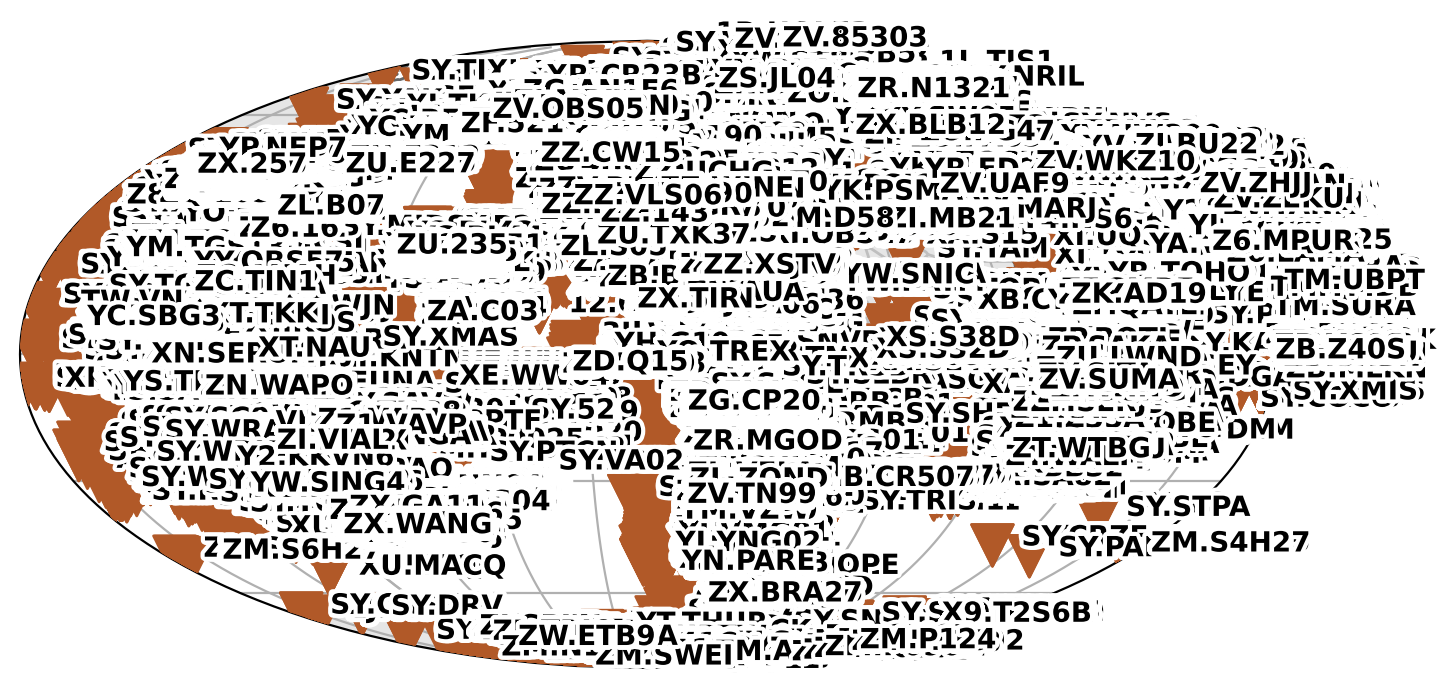

In [12]:
inventory.plot() 

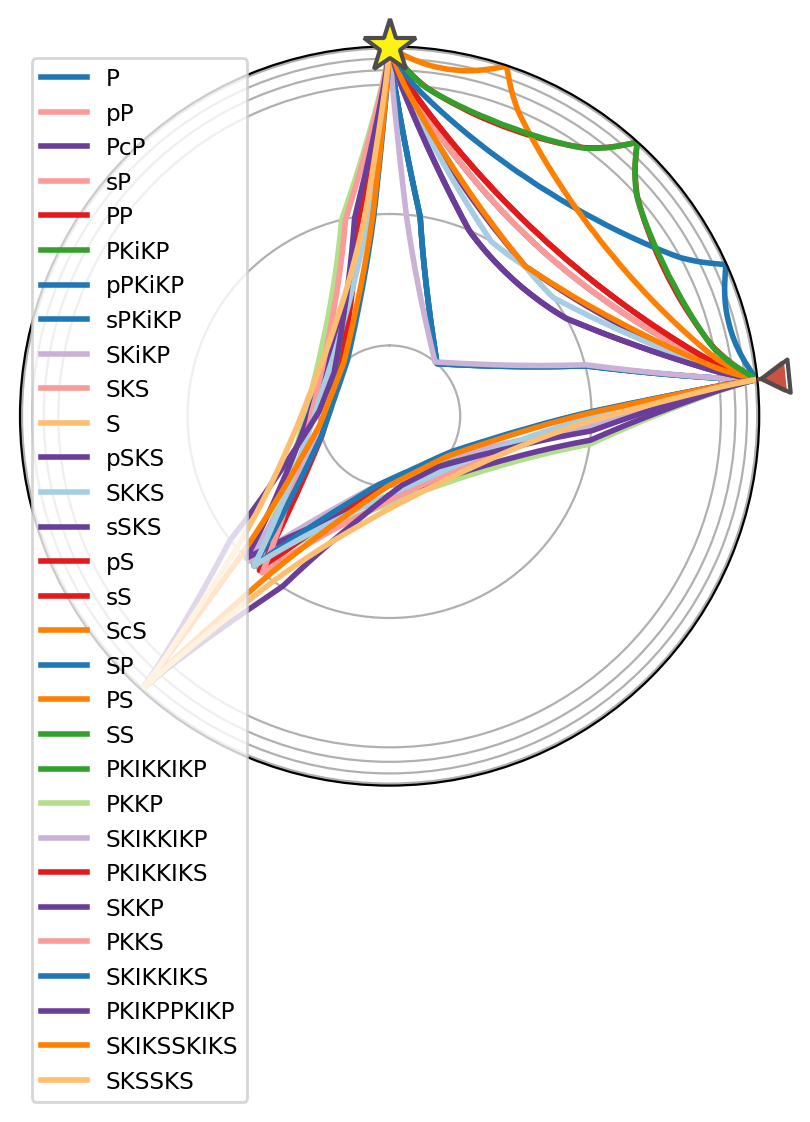

<PolarAxes: >

In [14]:
rays = model.get_ray_paths(source_depth_in_km=evdepth, distance_in_degree=distance_deg)
rays.plot_rays(plot_type='spherical', legend=True)

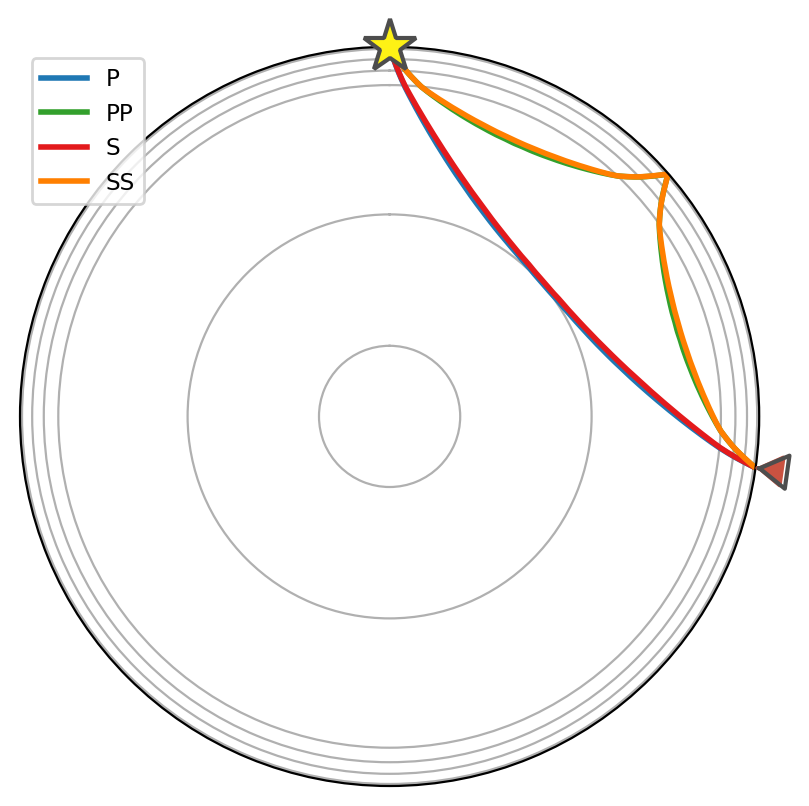

<PolarAxes: >

In [32]:
rays = model.get_ray_paths(source_depth_in_km=evdepth, distance_in_degree=distance_deg, phase_list=['P', 'S', 'PP', 'SS'])
rays.plot_rays(plot_type='spherical', legend=True, phase_list=['P', 'S', 'PP', 'SS'])

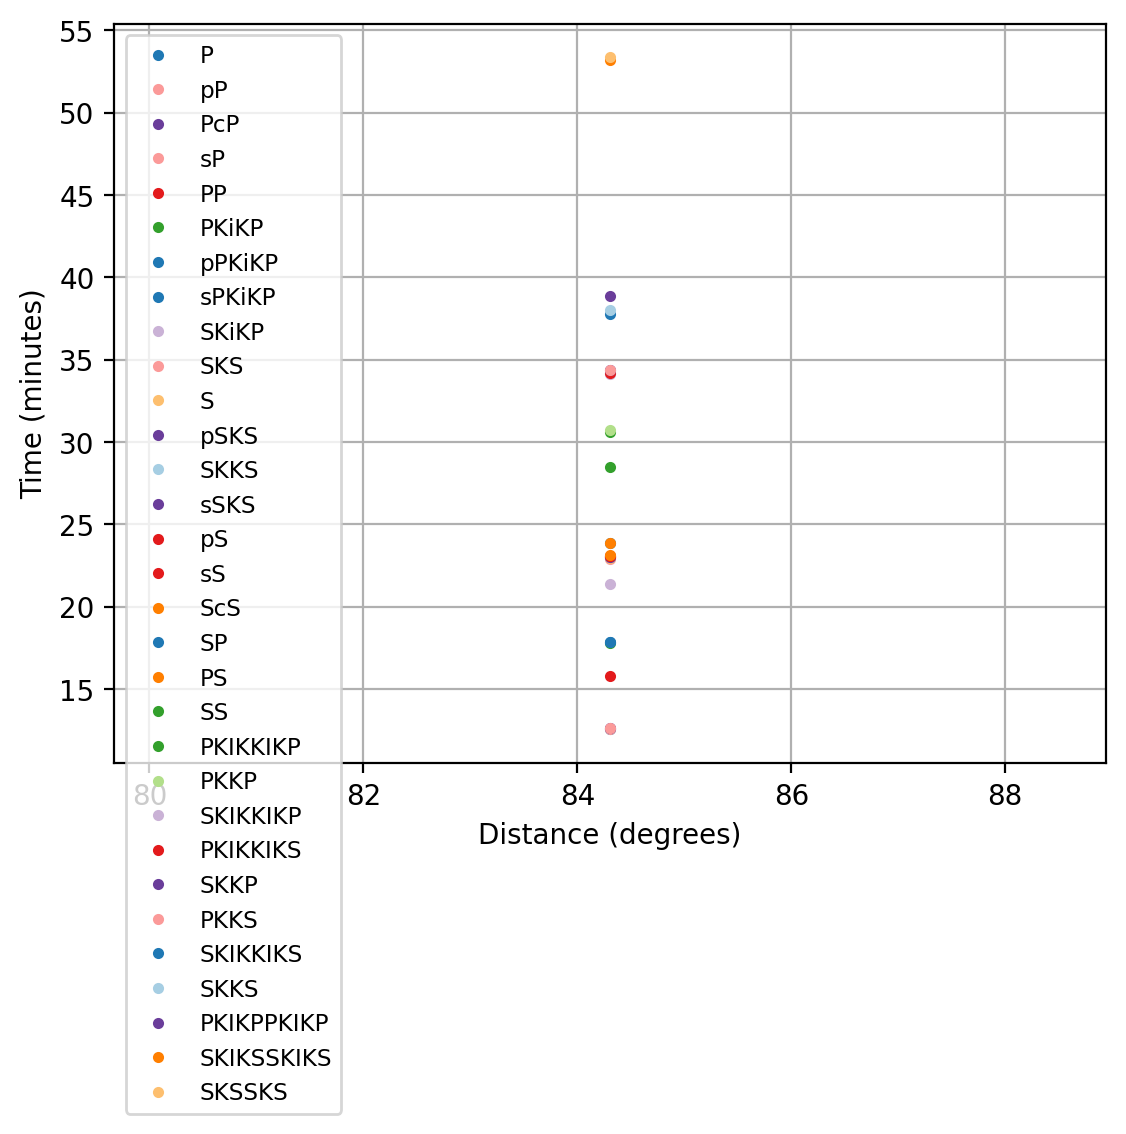

<Axes: xlabel='Distance (degrees)', ylabel='Time (minutes)'>

In [15]:
rays.plot_times(legend=True)

In [27]:
from obspy.taup import plot_travel_times

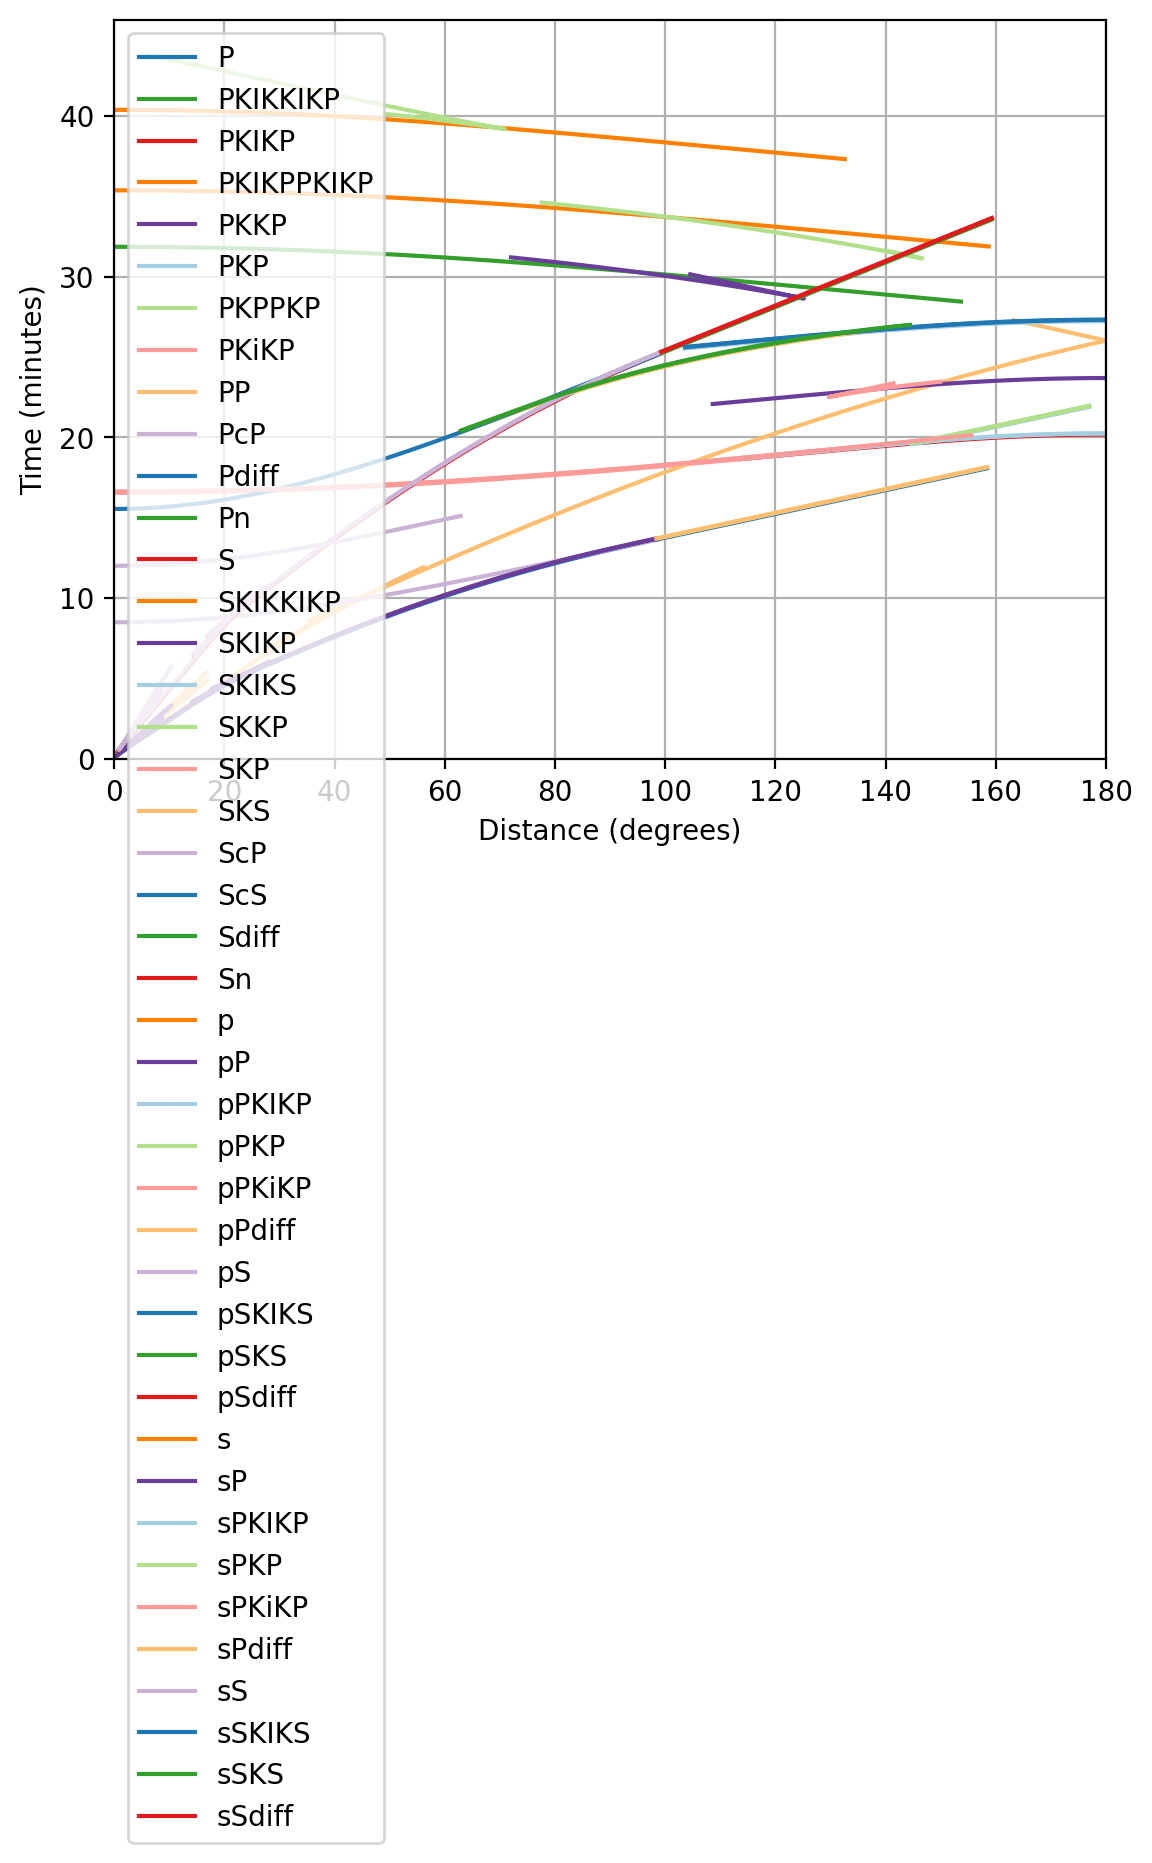

<Axes: xlabel='Distance (degrees)', ylabel='Time (minutes)'>

In [16]:
plot_travel_times(source_depth=evdepth)

## Some Testing 2

In [5]:
client = Client("AUSPASS")
t1, t2 = UTCDateTime("2023-05-01"), UTCDateTime("2023-05-02")
catalog = client.get_events(starttime=t1, endtime=t2, minmagnitude=4.0)
event = catalog[0]
origin = event.preferred_origin() or event.origins[0]
evlat, evlon, evdepth = origin.latitude, origin.longitude, origin.depth / 1000

inventory = client.get_stations(network='*', station='*')
st_lat = inventory[0][0].latitude
st_lon = inventory[0][0].longitude

from obspy.geodetics import locations2degrees
distance_deg = locations2degrees(evlat, evlon, st_lat, st_lon)
arrivals = model.get_travel_times(source_depth_in_km=evdepth, distance_in_degree=distance_deg)
for arr in arrivals:
    print(arr.name, arr.time, "s")

P 426.1799161892069 s
pP 429.2681363484243 s
sP 430.5997146680372 s
PP 509.2553821060867 s
PP 509.55601537433245 s
PP 511.59936524252316 s
PP 515.033880088834 s
PP 515.0363561113019 s
PP 526.2239968430803 s
PP 526.2763862431749 s
PcP 569.036864670844 s
S 769.8514036250632 s
pS 773.535421025324 s
sS 775.1331459128755 s
SP 776.0400000127981 s
PS 777.6424291041188 s
ScP 795.7507142113718 s
PcS 797.0166027647061 s
SS 920.7149722009615 s
SS 930.7813865283129 s
SS 934.1728211491964 s
SS 959.7280436555355 s
SS 960.1063208039882 s
PKiKP 1007.6097030697019 s
pPKiKP 1011.0550130100328 s
sPKiKP 1012.3076895725723 s
ScS 1042.4392835951874 s
SKiKP 1219.3014740461506 s
PKIKKIKP 1896.0540351797406 s
SKIKKIKP 2107.71368586379 s
PKIKKIKS 2108.9663375892155 s
SKIKKIKS 2320.553611893591 s
PKIKPPKIKP 2402.805746211468 s
PKPPKP 2493.6278131423264 s
SKIKSSKIKS 3254.372249276827 s


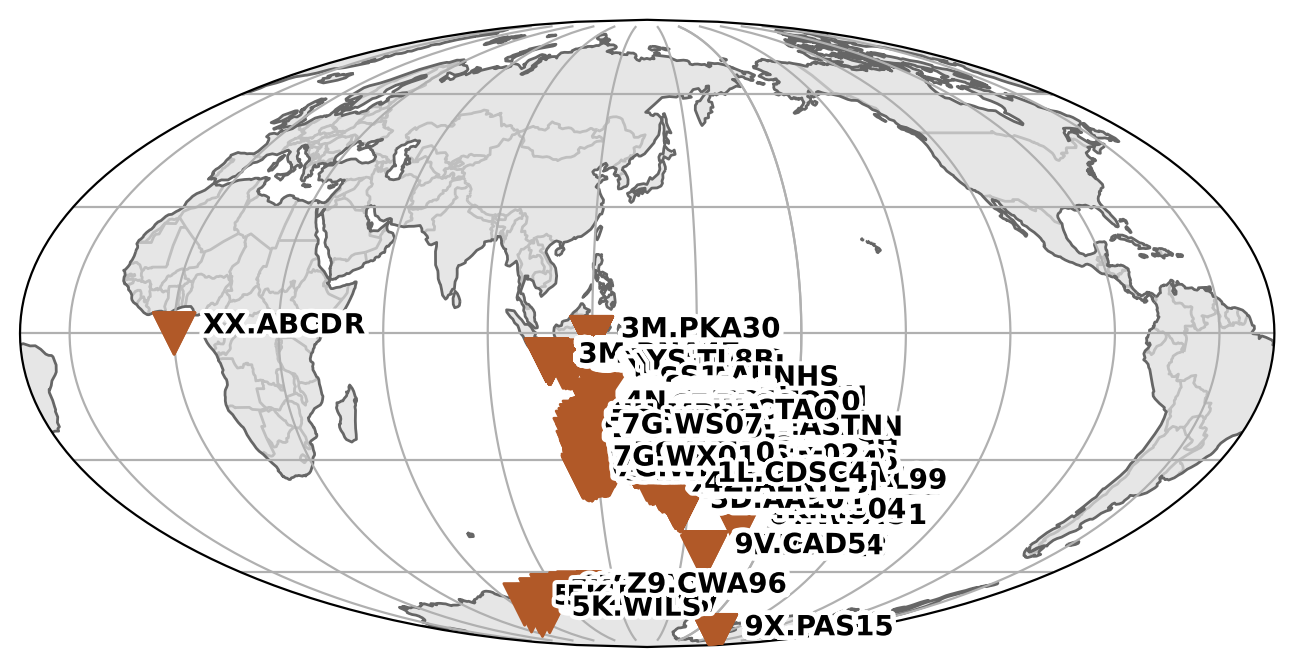

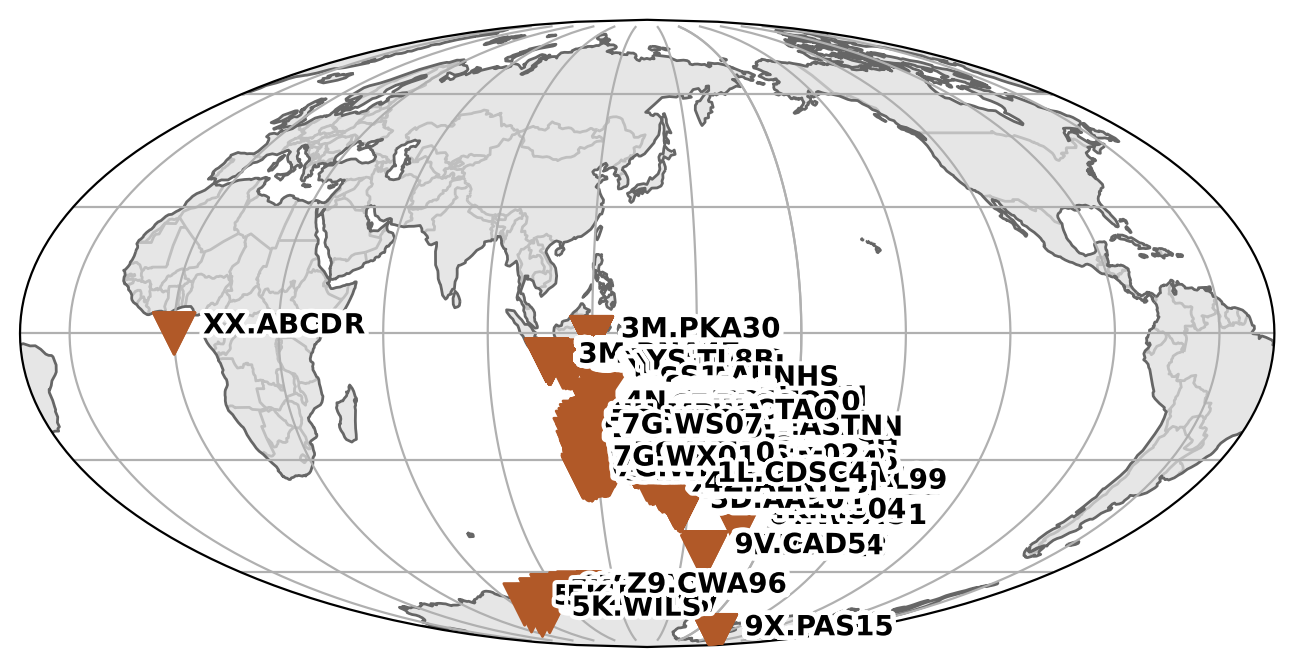

In [6]:
inventory.plot() 

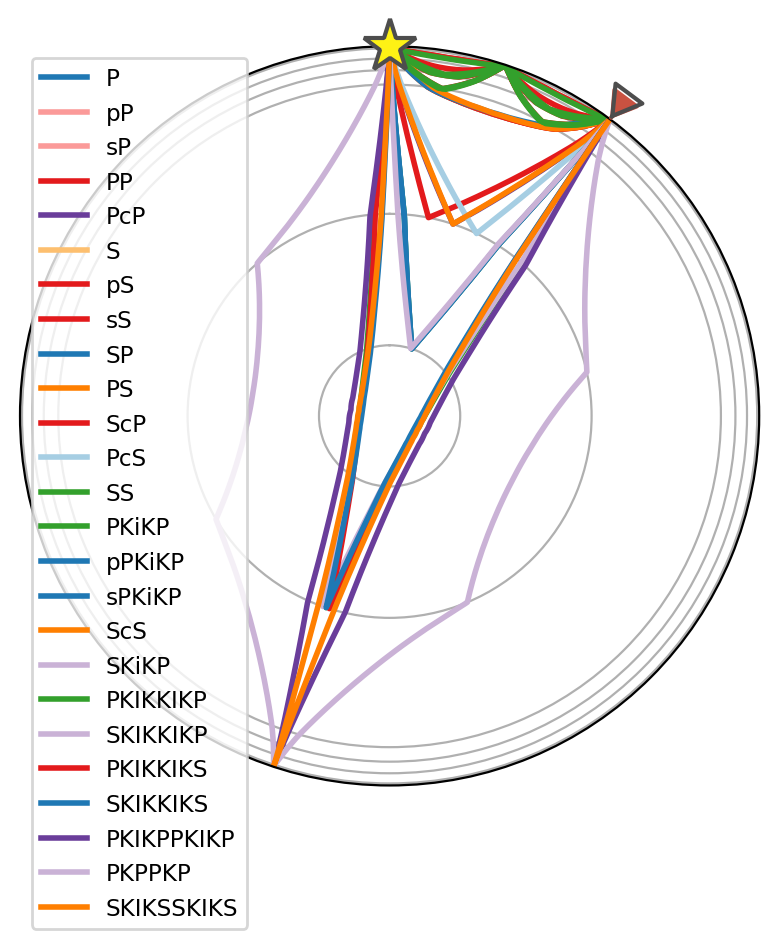

<PolarAxes: >

In [7]:
rays = model.get_ray_paths(source_depth_in_km=evdepth, distance_in_degree=distance_deg)
rays.plot_rays(plot_type='spherical', legend=True)

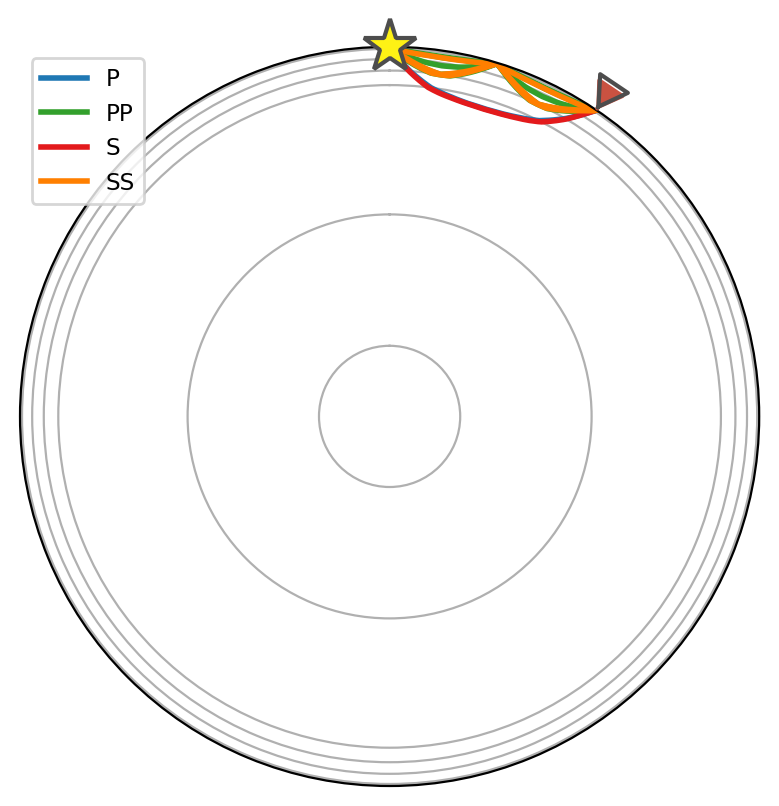

<PolarAxes: >

In [9]:
rays = model.get_ray_paths(source_depth_in_km=evdepth, distance_in_degree=distance_deg, phase_list=['P', 'S', 'PP', 'SS'])
rays.plot_rays(plot_type='spherical', legend=True, phase_list=['P', 'S', 'PP', 'SS'])

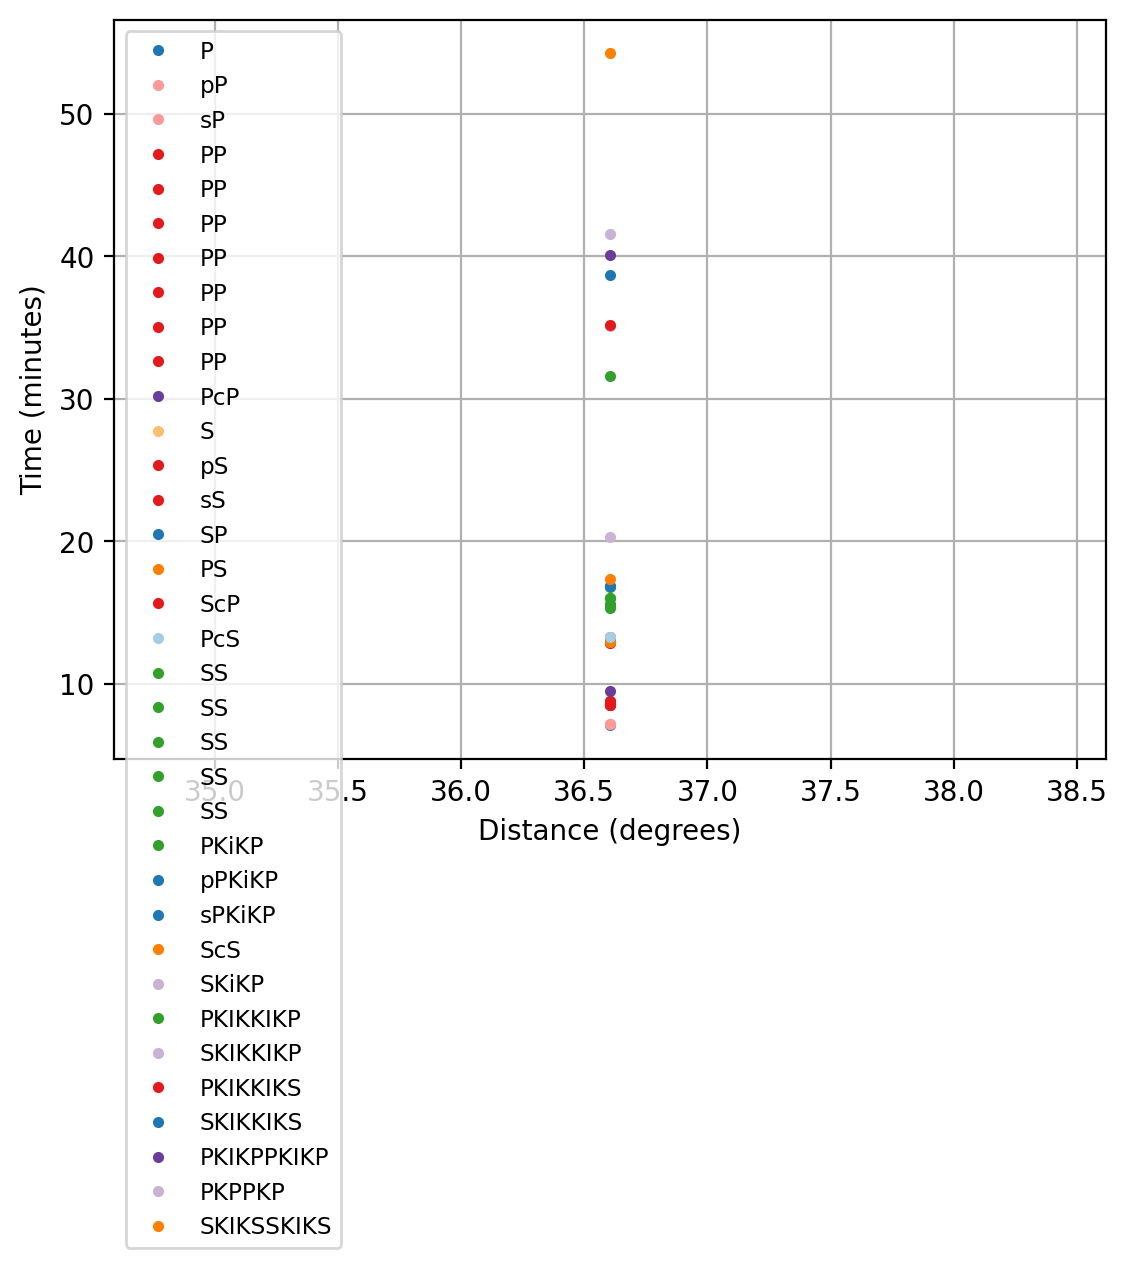

<Axes: xlabel='Distance (degrees)', ylabel='Time (minutes)'>

In [8]:
rays.plot_times(legend=True)

In [9]:
from obspy.taup import plot_travel_times

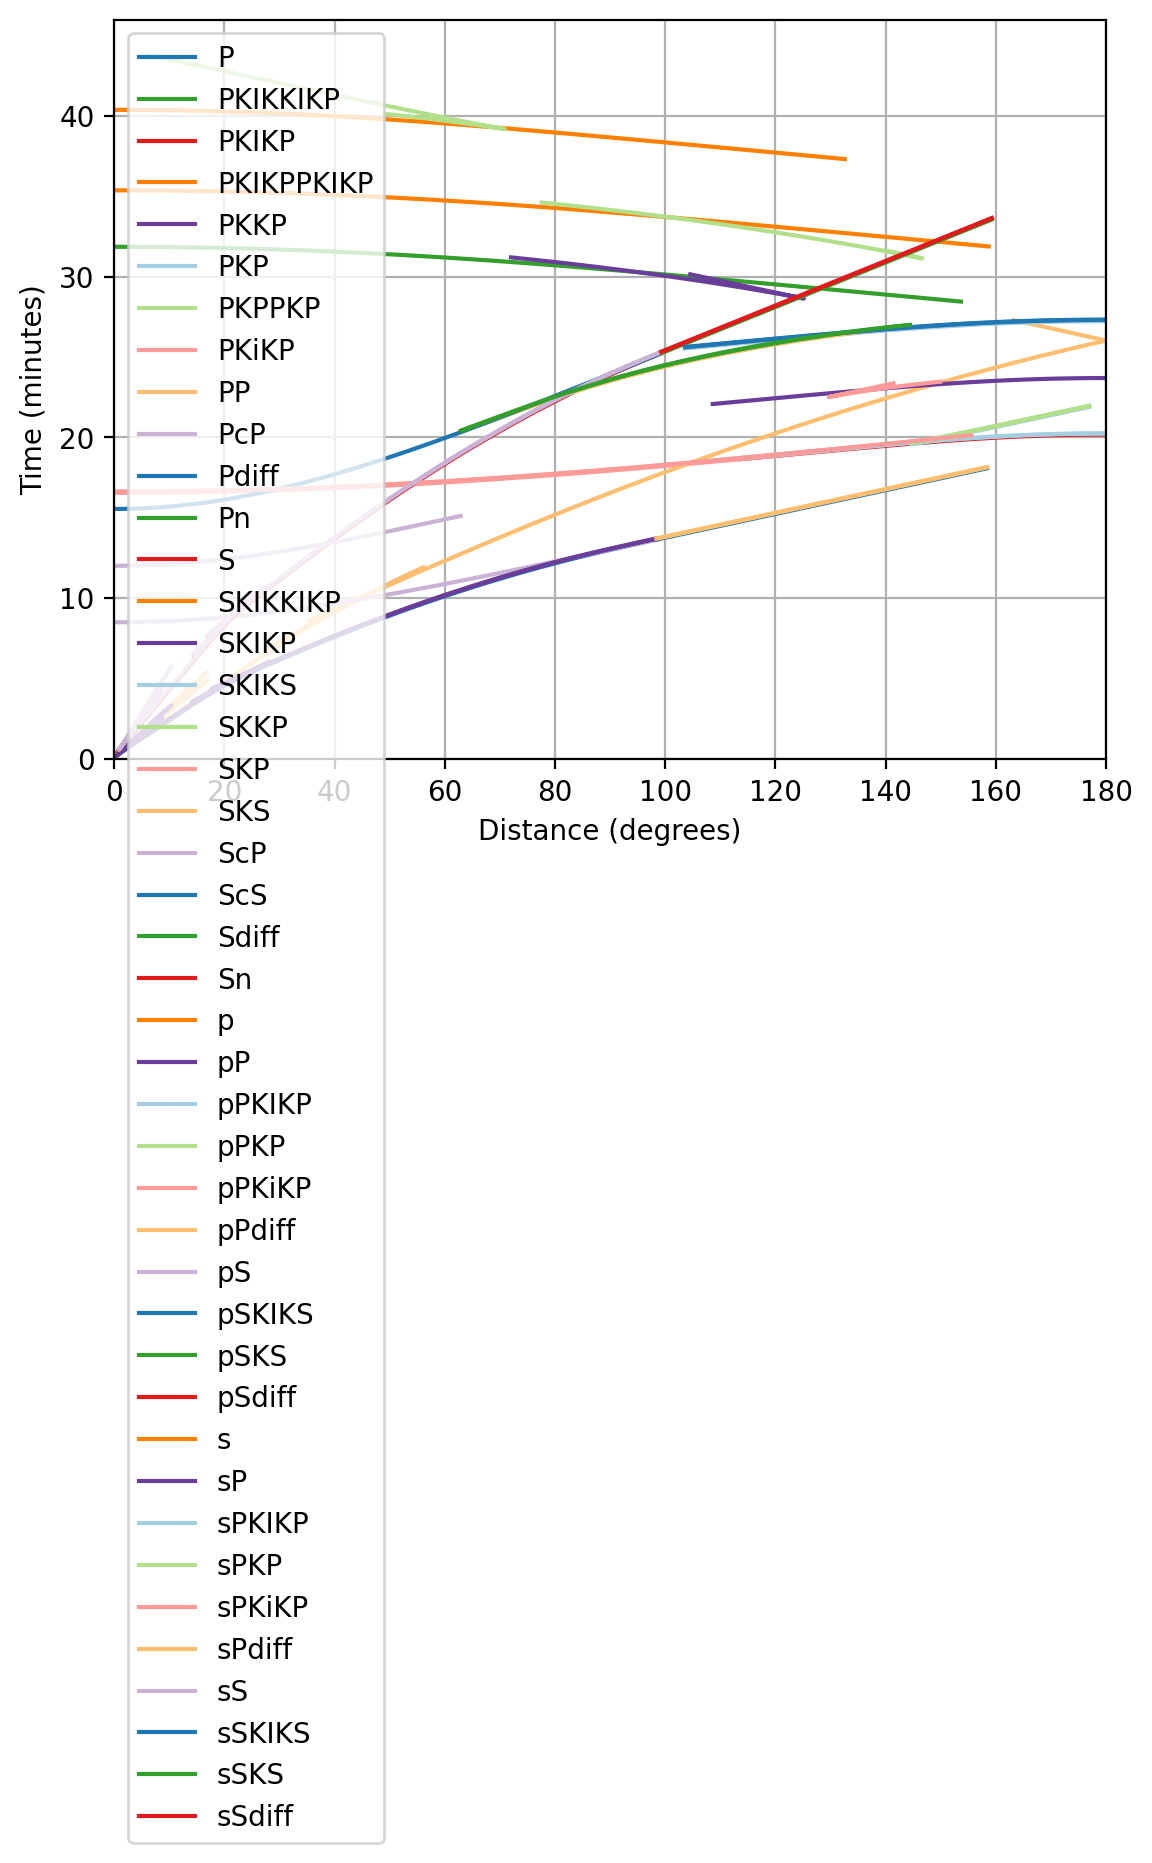

<Axes: xlabel='Distance (degrees)', ylabel='Time (minutes)'>

In [10]:
plot_travel_times(source_depth=evdepth)

## Ambient Noise Cross-Correlation with ObsPy

In [6]:
import obspy
from obspy import Stream
from obspy.geodetics import gps2dist_azimuth

In [7]:
sta1_lon = 104.462283; sta1_lat = 29.409383
sta2_lon = 104.483083; sta2_lat = 29.478317
dist_m,_,_ = gps2dist_azimuth(sta1_lat,sta1_lon,sta2_lat,sta2_lon)
dist_km = dist_m/1000

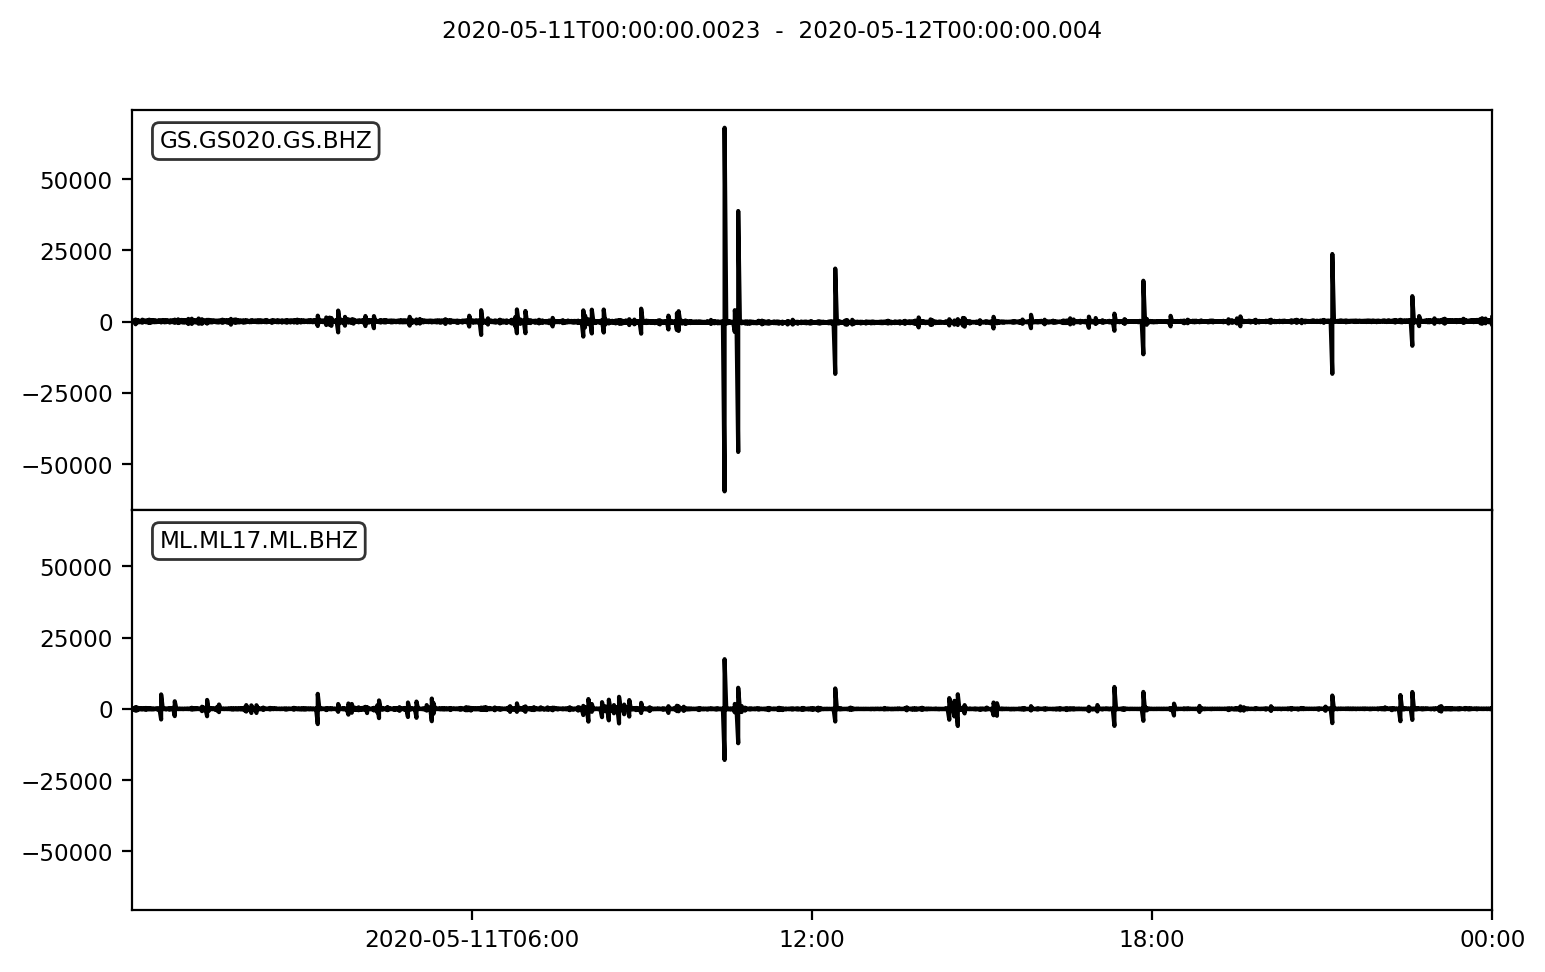

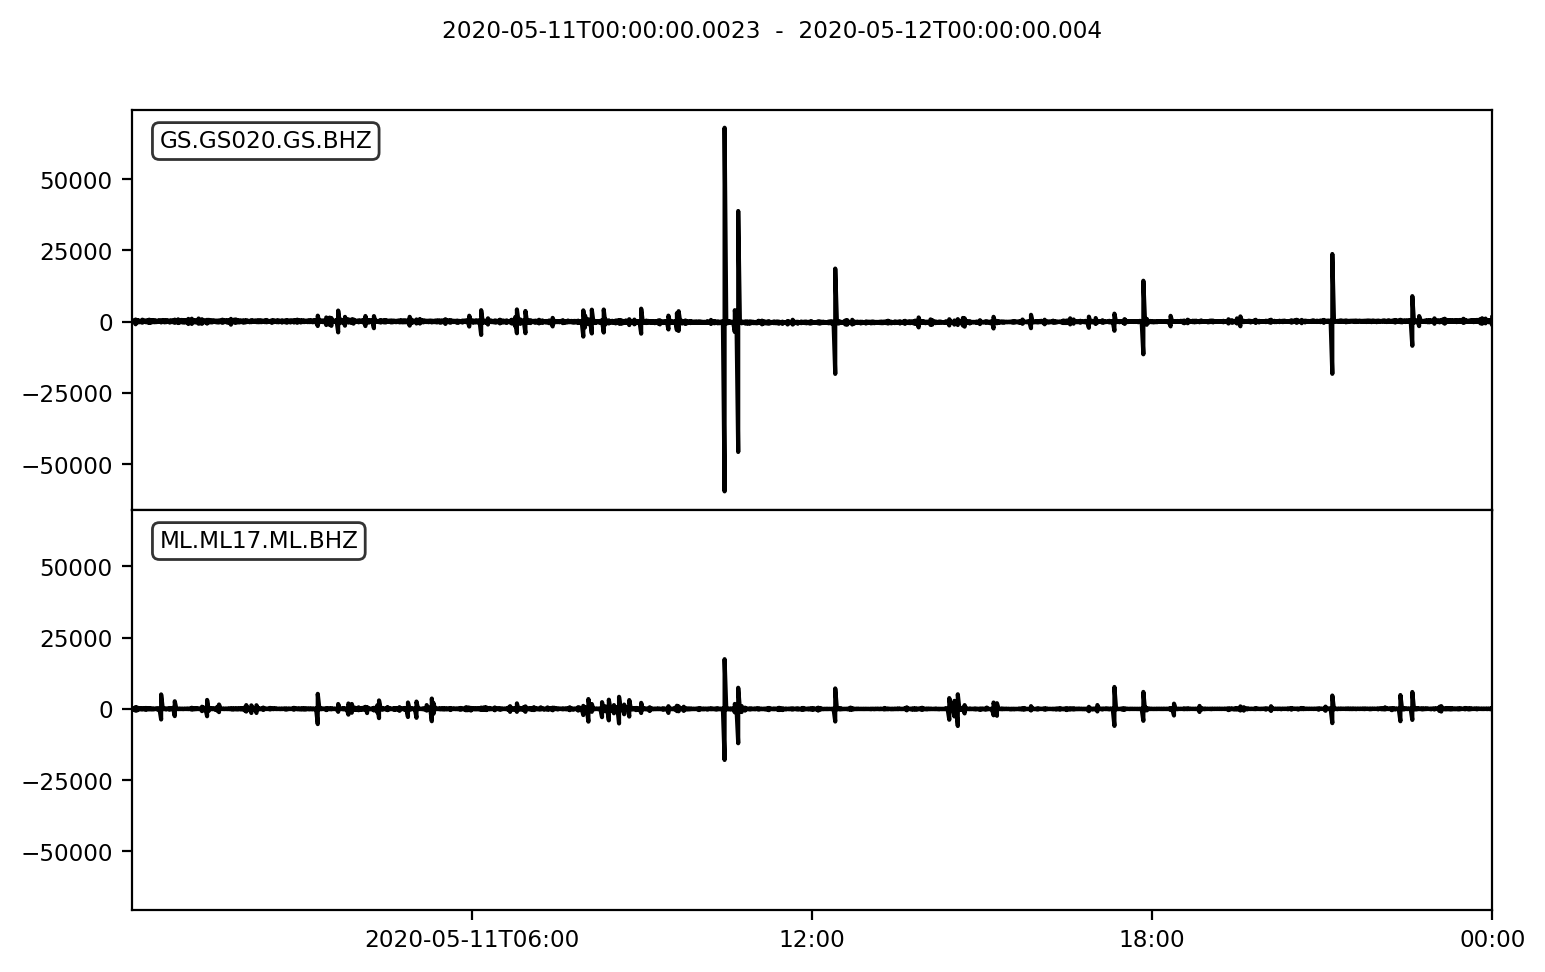

In [8]:
st = Stream()
st1 = obspy.read("data/GS020_BHZ_20200512.mseed") # Load 1 Day Data from Station GS020
st.append(st1[0])
st2 = obspy.read("data/ML17_BHZ_20200512.mseed") # Load 1 Day Data from Station ML17
st.append(st2[0])
st.detrend("linear")
st.detrend("constant")
st.plot()

In [17]:
st1[0].stats

         network: GS
         station: GS020
        location: GS
         channel: BHZ
       starttime: 2020-05-11T00:00:00.002300Z
         endtime: 2020-05-12T00:00:00.002300Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 1728001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 17740, 'encoding': 'STEIM2', 'byteorder': '<', 'record_length': 512, 'filesize': 9082880})
      processing: ["ObsPy 1.4.2: detrend(options={}::type='linear')", "ObsPy 1.4.2: detrend(options={}::type='constant')", "ObsPy 1.4.2: filter(options={'freqmin': 0.2, 'freqmax': 0.5, 'zerophase': True}::type='bandpass')", "ObsPy 1.4.2: filter(options={'freq': 10.0, 'maxorder': 12}::type='lowpass_cheby_2')", 'ObsPy 1.4.2: decimate(factor=5::no_filter=False::strict_length=False)']

In [18]:
st2[0].stats

         network: ML
         station: ML17
        location: ML
         channel: BHZ
       starttime: 2020-05-11T00:00:00.004000Z
         endtime: 2020-05-12T00:00:00.004000Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 1728001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 15624, 'encoding': 'STEIM2', 'byteorder': '<', 'record_length': 512, 'filesize': 7999488})
      processing: ["ObsPy 1.4.2: detrend(options={}::type='linear')", "ObsPy 1.4.2: detrend(options={}::type='constant')", "ObsPy 1.4.2: filter(options={'freqmin': 0.2, 'freqmax': 0.5, 'zerophase': True}::type='bandpass')", "ObsPy 1.4.2: filter(options={'freq': 10.0, 'maxorder': 12}::type='lowpass_cheby_2')", 'ObsPy 1.4.2: decimate(factor=5::no_filter=False::strict_length=False)']

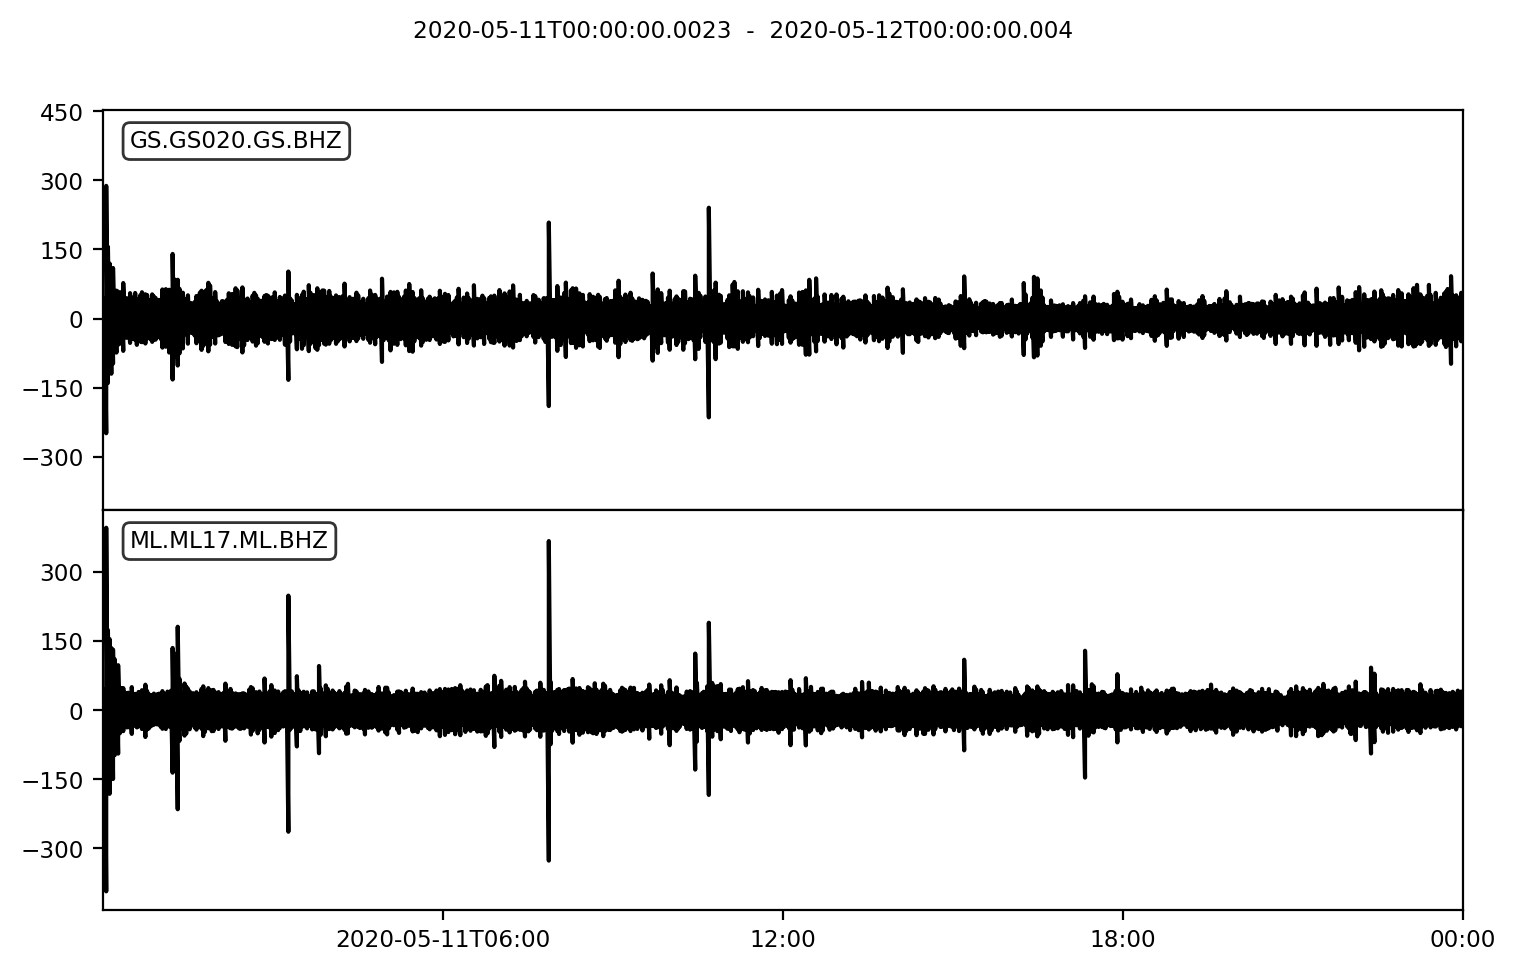

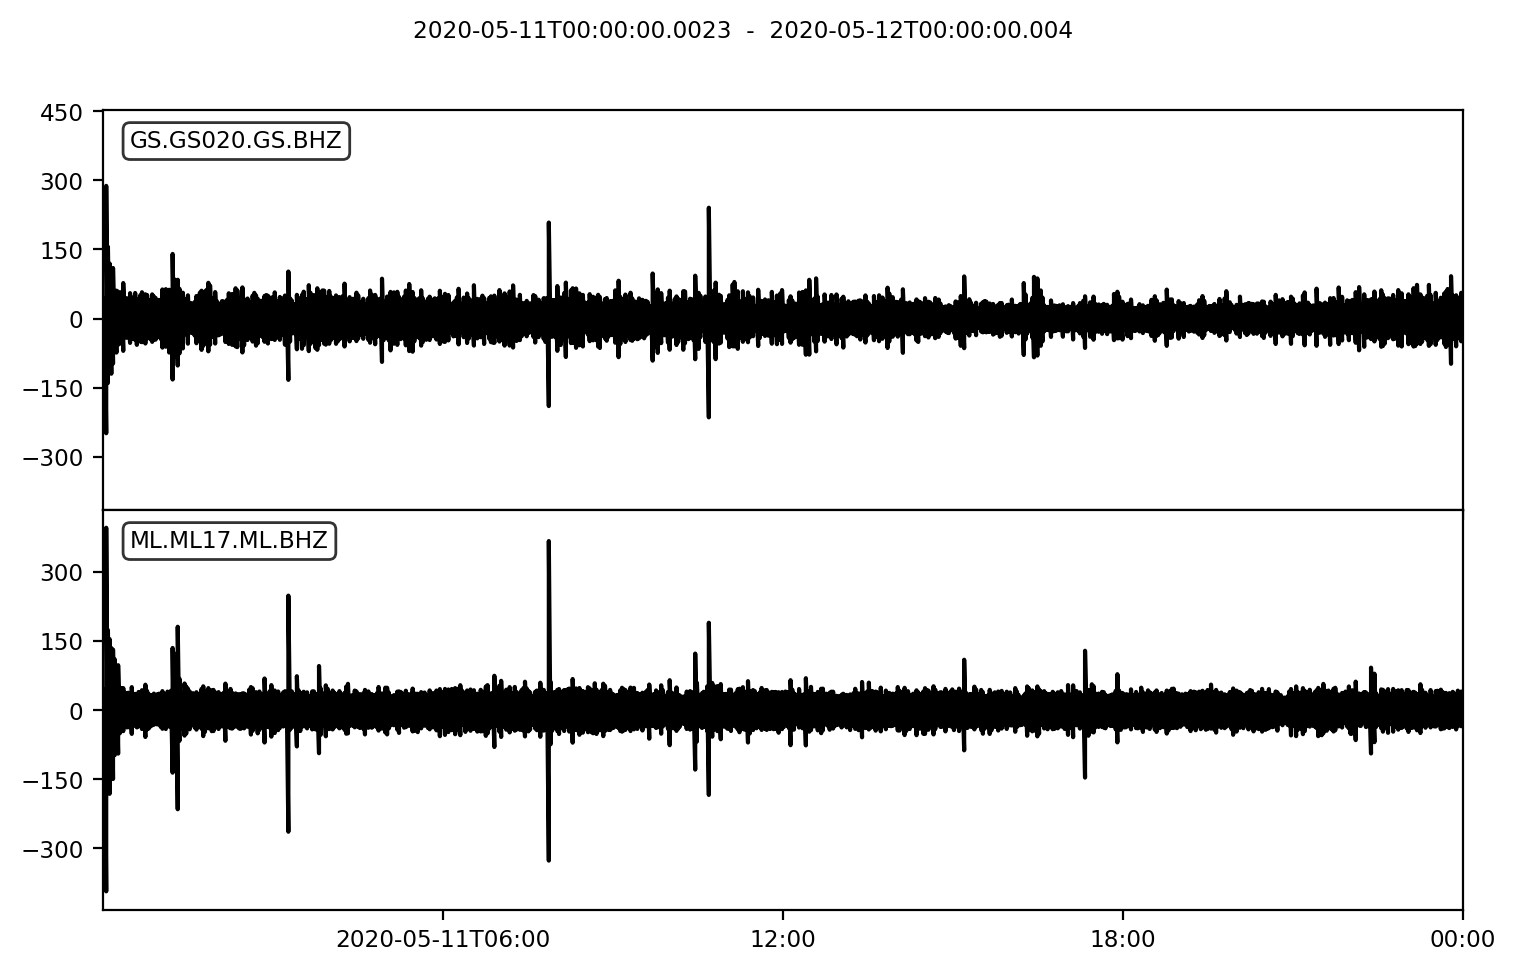

In [9]:
period_min = 2
period_max = 5
st.filter("bandpass",freqmin=1/period_max,freqmax=1/period_min,zerophase=True)
st_bak = st.copy()
st.plot()

In [10]:
print(f"Before down-sampling, station {st[0].stats.station} has data points {st[0].stats.npts} with sampling rate {st[0].stats.sampling_rate}")
st[0].decimate(factor=5)
print(f"Before down-sampling, station {st[0].stats.station} has data points {st[0].stats.npts} with sampling rate {st[0].stats.sampling_rate}")

print(f"Before down-sampling, station {st[1].stats.station} has data points {st[1].stats.npts} with sampling rate {st[1].stats.sampling_rate}")
st[1].decimate(factor=5)
print(f"Before down-sampling, station {st[1].stats.station} has data points {st[1].stats.npts} with sampling rate {st[1].stats.sampling_rate}")
fs_new = st[0].stats.sampling_rate

Before down-sampling, station GS020 has data points 8640001 with sampling rate 100.0
Before down-sampling, station GS020 has data points 1728001 with sampling rate 20.0
Before down-sampling, station ML17 has data points 8640001 with sampling rate 100.0
Before down-sampling, station ML17 has data points 1728001 with sampling rate 20.0


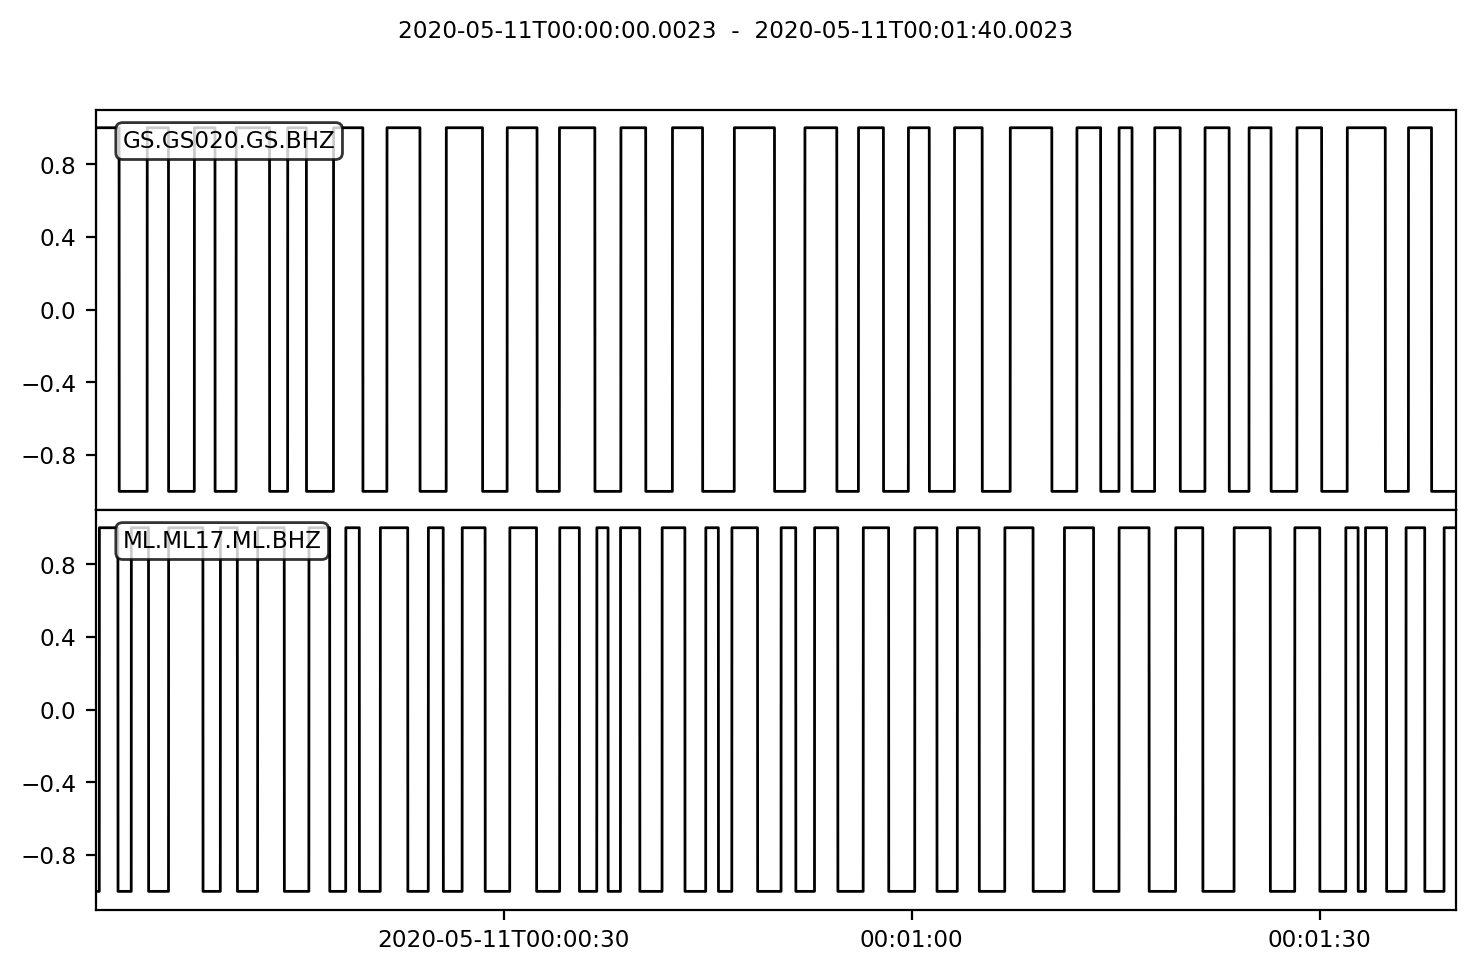

In [11]:
st = st_bak.copy()
st[0].data = np.sign(st[0].data)
st[1].data = np.sign(st[1].data)
starttime = st[0].stats.starttime
st.plot(starttime=starttime,endtime=starttime+100 );

In [12]:
max_lagtime = 50
max_shift_num = int(np.round(max_lagtime*st[0].stats.sampling_rate))
data1 = st[0].data
data2 = st[1].data
len1 = len(data1)
len2 = len(data2)
min_len = min(len1,len2)
cross_list = []
for shift_num in np.arange(-max_shift_num,max_shift_num+1,1):
    if shift_num<0:
        correlate_value = np.correlate(data1[:min_len+shift_num],data2[-shift_num:min_len])
        cross_list.append(correlate_value.ravel())
    else:
        correlate_value = np.correlate(data2[:min_len-shift_num],data1[shift_num:min_len])
        cross_list.append(correlate_value.ravel())
cross_list = np.array(cross_list)
cross_list = cross_list/np.max(cross_list)

In [14]:
cross_list.shape

(10001, 1)

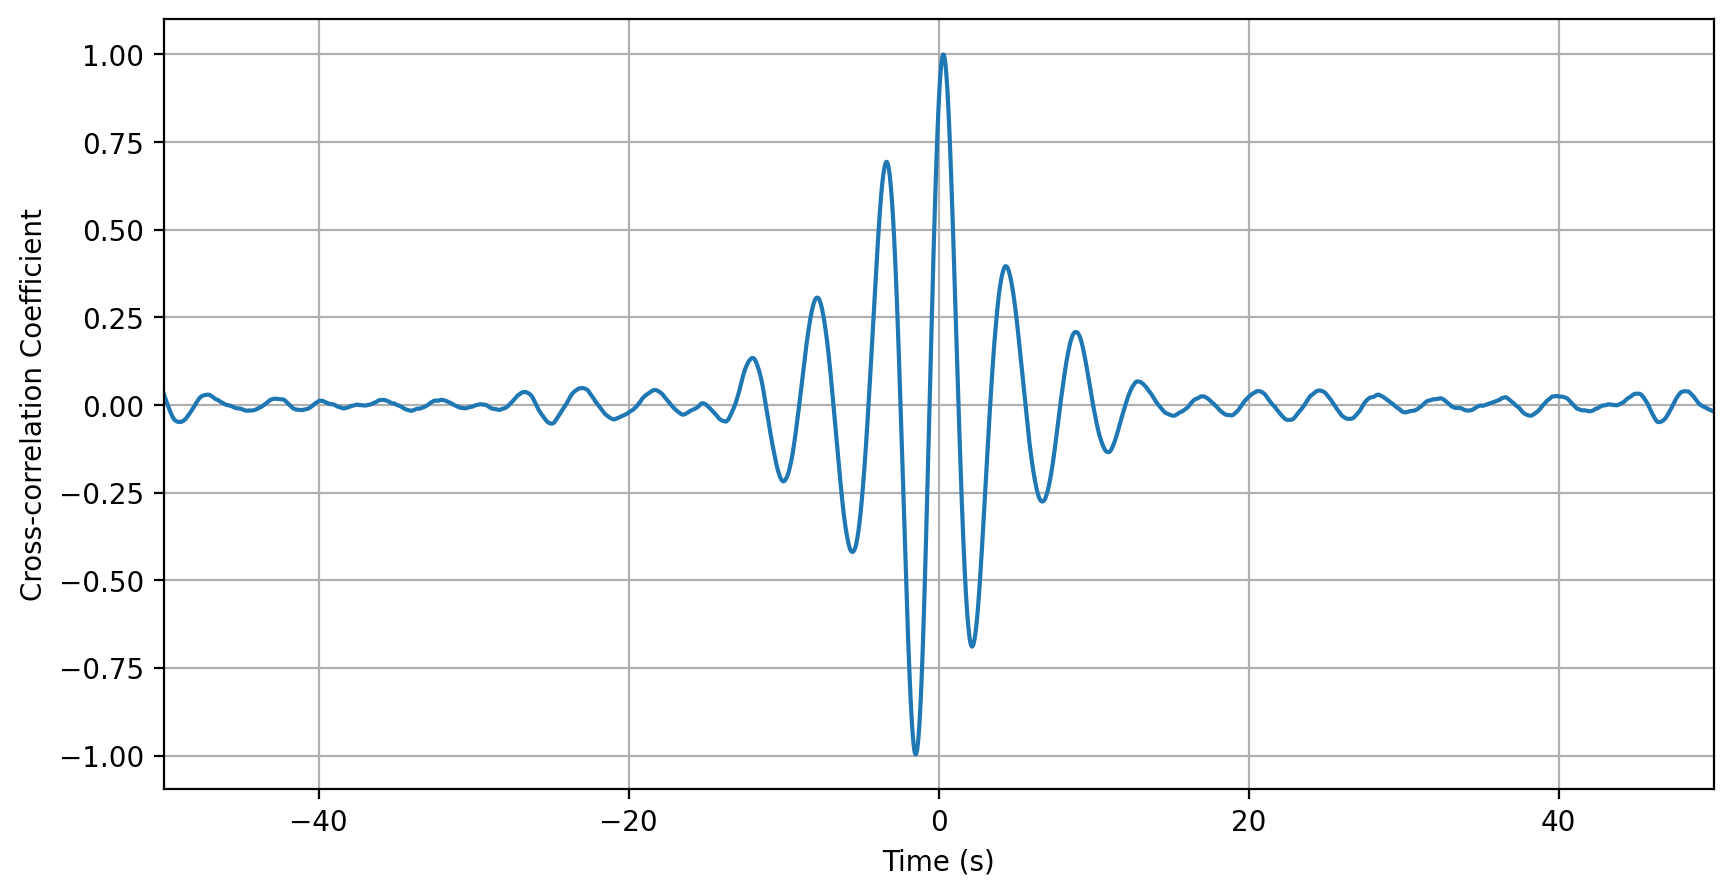

In [16]:
time = np.linspace(-max_lagtime, max_lagtime, cross_list.ravel().size)
plt.figure(figsize=(10,5))
plt.plot(time, cross_list.ravel())
plt.xlabel("Time (s)")
plt.ylabel("Cross-correlation Coefficient")
plt.xlim(-max_lagtime, max_lagtime)
plt.grid()
plt.show()